In [1]:
import technicalIndicators as ti
import datetime
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from stockstats import StockDataFrame


# DERIVED DATA SET FROM CRYPTOCOMPARE

In [2]:
symbol = 'BTC'
comparison_symbol = 'USD'
default_date = '2018-11-27'

In [3]:
df = pd.read_csv('data/{}/{}-{}.csv'.format(symbol, symbol, default_date))

In [4]:
df.describe()

,Unnamed: 0,unnamed: 0,close,high,low,open,time,volumefrom,volumeto,close_5_sma,...,close_-1_d,rs_14,rsi_14,close_20_sma,close_20_mstd,boll,boll_ub,boll_lb,tr,atr
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,3.000000e+02,300.000000,3.000000e+02,300.000000,...,299.000000,299.000000,299.000000,300.000000,299.000000,300.000000,299.000000,299.000000,299.000000,299.000000
mean,149.500000,2906.500000,7400.351200,7609.863300,7188.019967,7418.000500,1.530446e+09,85354.399267,6.498633e+08,7433.775436,...,-16.819498,inf,45.918381,7525.696702,509.828318,7525.696702,8540.854597,6501.541326,418.699900,457.282721
std,86.746758,86.746758,1432.952426,1499.320002,1349.676342,1421.452467,7.494920e+06,57302.681507,4.685156e+08,1379.903784,...,312.671933,NaN,12.586149,1216.048708,299.059856,1216.048708,1651.125805,971.888672,330.499075,296.199410
min,0.000000,2757.000000,3784.590000,3878.900000,3550.040000,3784.770000,1.517530e+09,5589.390000,2.148663e+07,3861.526000,...,-1280.970000,0.106718,9.642756,5093.621500,59.898321,5093.621500,6533.136624,3079.440314,33.050000,102.889041
25%,74.750000,2831.750000,6465.980000,6551.295000,6348.870000,6468.722500,1.523988e+09,48441.012500,3.269160e+08,6464.234000,...,-131.460000,0.627337,38.549884,6515.480125,267.565831,6515.480125,6966.096438,5943.533271,189.635000,276.950749
50%,149.500000,2906.500000,6916.465000,7137.090000,6684.605000,6926.815000,1.530446e+09,68848.910000,5.221852e+08,7003.552000,...,-4.800000,0.833225,45.451313,7223.687000,492.115312,7223.687000,8246.315896,6231.504151,311.980000,348.587133
75%,224.250000,2981.250000,8262.620000,8533.950000,7979.147500,8271.770000,1.536905e+09,111653.570000,8.280157e+08,8292.937500,...,106.745000,1.153192,53.556892,8377.030625,717.519799,8377.030625,9745.512251,6933.031263,547.545000,539.864503
max,299.000000,3056.000000,11504.420000,11802.230000,11431.550000,11503.940000,1.543363e+09,495883.240000,3.397597e+09,11276.600000,...,950.600000,inf,100.000000,10618.537500,1299.210936,10618.537500,12172.449344,9420.729636,1964.020000,1657.705267


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 29 columns):
Unnamed: 0       300 non-null int64
unnamed: 0       300 non-null int64
close            300 non-null float64
high             300 non-null float64
low              300 non-null float64
open             300 non-null float64
time             300 non-null int64
volumefrom       300 non-null float64
volumeto         300 non-null float64
timestamp        300 non-null object
close_5_sma      300 non-null float64
close_50_sma     300 non-null float64
close_5_ema      300 non-null float64
close_12_ema     300 non-null float64
close_26_ema     300 non-null float64
macd             300 non-null float64
macds            300 non-null float64
macdh            300 non-null float64
close_-1_s       299 non-null float64
close_-1_d       299 non-null float64
rs_14            299 non-null float64
rsi_14           299 non-null float64
close_20_sma     300 non-null float64
close_20_mstd    299 non-nul

In [6]:
df.head()

,Unnamed: 0,unnamed: 0,close,high,low,open,time,volumefrom,volumeto,timestamp,...,close_-1_d,rs_14,rsi_14,close_20_sma,close_20_mstd,boll,boll_ub,boll_lb,tr,atr
0,0,2757,8870.82,9147.93,7786.20,9114.73,1517529600,322596.22,2.768760e+09,2018-02-01 19:00:00,...,NaN,NaN,NaN,8870.820000,NaN,8870.820000,NaN,NaN,NaN,NaN
1,1,2758,9251.27,9504.37,8194.68,8872.87,1517616000,139226.07,1.253485e+09,2018-02-02 19:00:00,...,380.45,inf,100.000000,9061.045000,269.018775,9061.045000,9599.082550,8523.007450,1309.69,1309.690000
2,2,2759,8218.05,9400.99,7889.83,9251.27,1517702400,164609.06,1.413207e+09,2018-02-03 19:00:00,...,-1033.22,0.341917,25.479717,8780.046667,522.556926,8780.046667,9825.160518,7734.932815,1511.16,1414.155926
3,3,2760,6937.08,8391.29,6627.31,8218.05,1517788800,341828.54,2.534149e+09,2018-02-04 19:00:00,...,-1280.97,0.146422,12.772048,8319.305000,1015.468050,8319.305000,10350.241100,6288.368900,1763.98,1539.504223
4,4,2761,7701.25,7932.38,5968.36,6936.43,1517875200,495883.24,3.397597e+09,2018-02-05 19:00:00,...,764.17,0.513747,33.938772,8195.694000,921.835081,8195.694000,10039.364163,6352.023837,1964.02,1657.705267


# CLOSE

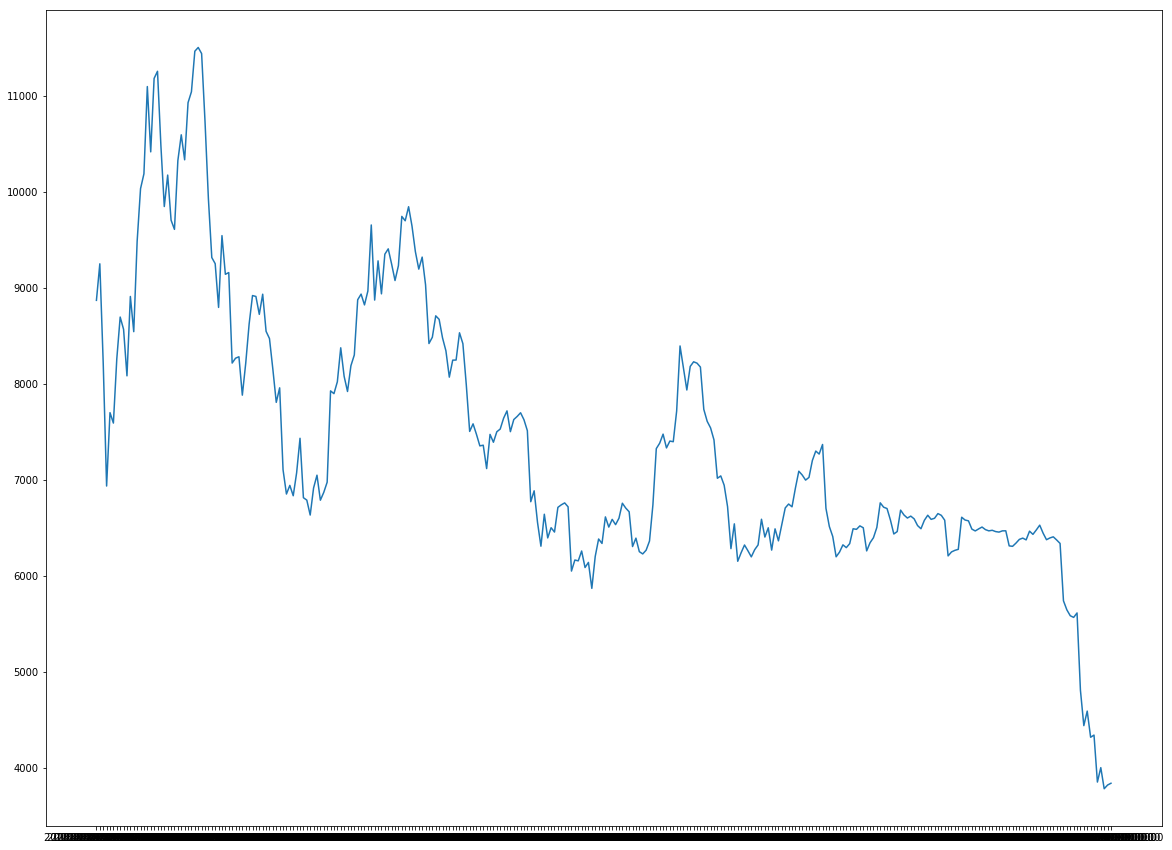

In [7]:
%matplotlib inline
plt.figure(figsize = (20,15))
plt.plot('timestamp', 'close', data = df)

# MOVING AVERAGE

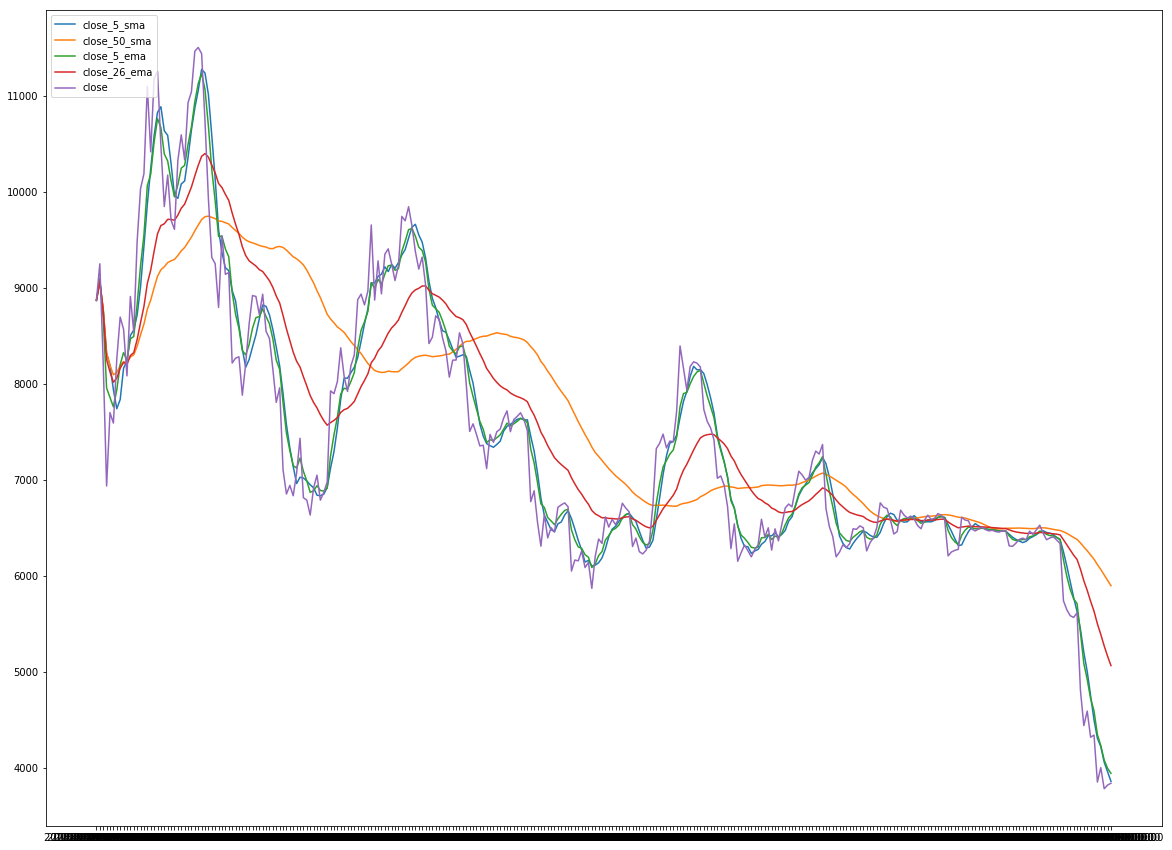

In [8]:
%matplotlib inline
plt.figure(figsize = (20,15))
plt.plot('timestamp', 'close_5_sma', data = df, label = 'close_5_sma')
plt.plot('timestamp', 'close_50_sma', data = df, label = 'close_50_sma')
plt.plot('timestamp', 'close_5_ema', data = df, label = 'close_5_ema')
plt.plot('timestamp', 'close_26_ema', data = df, label = 'close_26_ema')
plt.plot('timestamp', 'close', data = df, label = 'close')
plt.legend(loc = 2)

# MACD

The Moving Average Convergence Divergence (MACD) is a trend-following momentum indicator that shows the relationship between two moving averages of a security’s price.

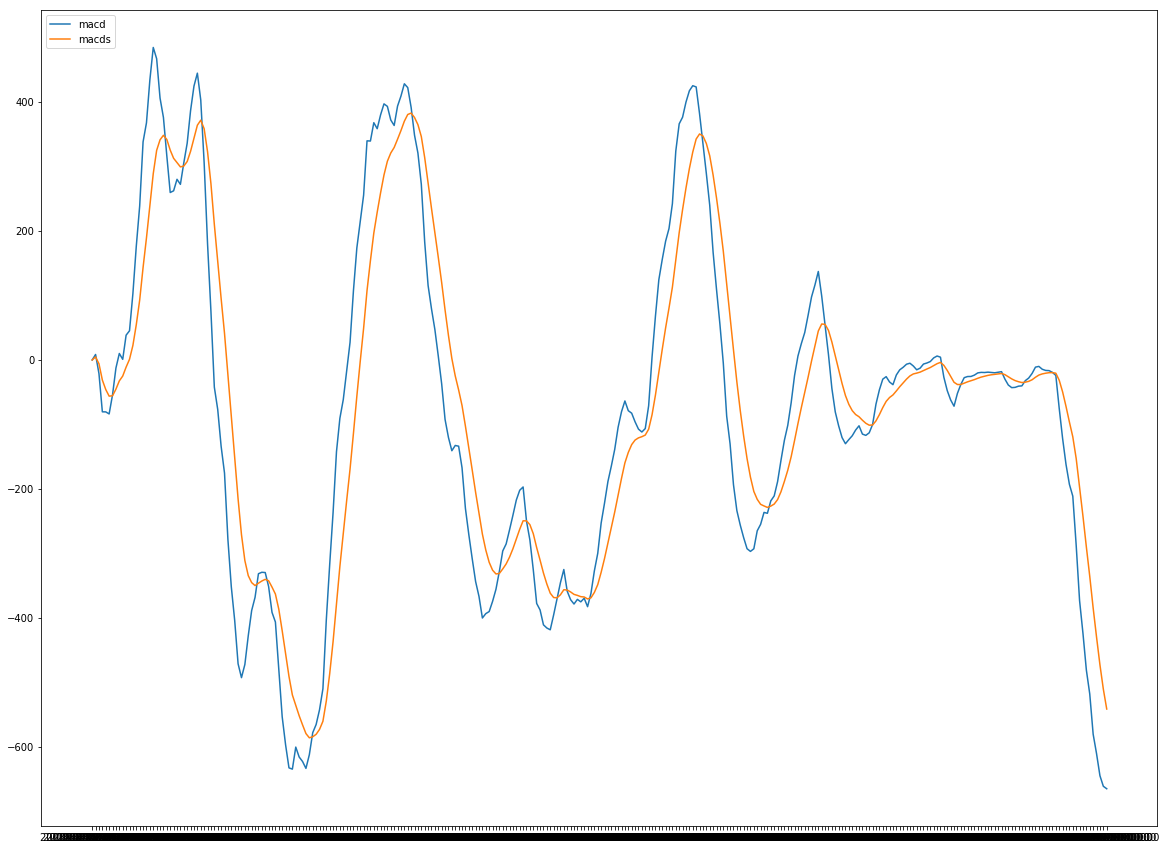

In [9]:
df = pd.read_csv('data/{}/{}-{}.csv'.format(symbol, symbol, default_date))
%matplotlib inline
plt.figure(figsize = (20,15))
plt.plot('timestamp', 'macd', data = df, label = 'macd')
plt.plot('timestamp', 'macds', data = df, label = 'macds')
plt.legend(loc=2)

In [10]:

col1 = ti.get_col_index(df, 'macd')
col2 = ti.get_col_index(df, 'macds')
c = []
for x in range(len(df['timestamp'])):
    c.append(ti.crossover(df, x, col1, col2))
c = pd.Series(c)
df = df[['close', 'open', 'high', 'low', 'macd', 'macds']]
df = df.assign(signal=c.values)
df = ti.filter_signals(df)
#print(df.head())
returns_list = ti.calc_returns(df)
#print(returns_list)
cumulative_returns = ti.cumulative_returns(returns_list)

Trade Sum: 0.2057900334826388
Positive Return!


# RSI

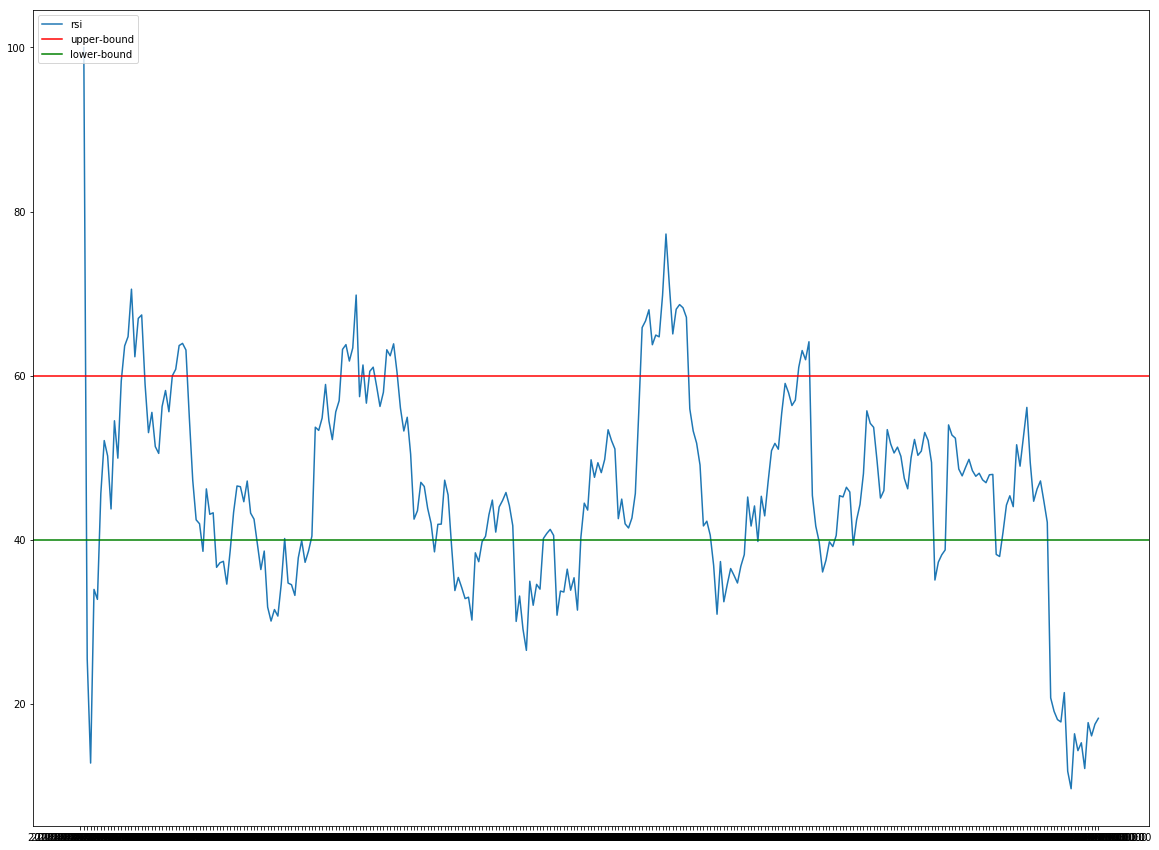

In [23]:
df = pd.read_csv('data/{}/{}-{}.csv'.format(symbol, symbol, default_date))
%matplotlib inline
plt.figure(figsize = (20,15))
plt.plot('timestamp', 'rsi_14', data = df, label = 'rsi')
plt.axhline(y=60, color = 'red', label = 'upper-bound')
plt.axhline(y=40, color = 'green', label = 'lower-bound')
plt.legend(loc = 2)

In [15]:
df = pd.read_csv('data/{}/{}-{}.csv'.format(symbol, symbol, default_date))
brute_results = ti.brute_force_opt(df, 'rsi', 23, 24, 3, 4, 40, 60, dupe_bool = True)
print('OPTIM: {}'.format(brute_results[0]))
#print('SHARPE RATIO: {}'.format(brute_results[1]))
print('CUMULATIVE RETURNS: {}'.format(brute_results[2]))
print('HEAD:\n {}'.format(brute_results[3].head()))

OPTIM: (23, 3)
CUMULATIVE RETURNS: 0.7236367307457343
HEAD:
       close      open      high       low     rsi_23         ma signal
0   7701.25   6936.43   7932.38   5968.36  33.574492  24.306856    Buy
1  10417.23  11097.21  11288.34  10161.01  60.789205  63.399334   Sell
2   6943.77   6853.75   7228.40   6806.34  37.038683  36.936738    Buy
3   8873.62   9657.69   9765.23   8757.06  54.200328  57.166102   Sell
4   7474.75   7118.88   7533.03   7069.01  41.873781  39.722517    Buy


/Users/kevin_le/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


# WR

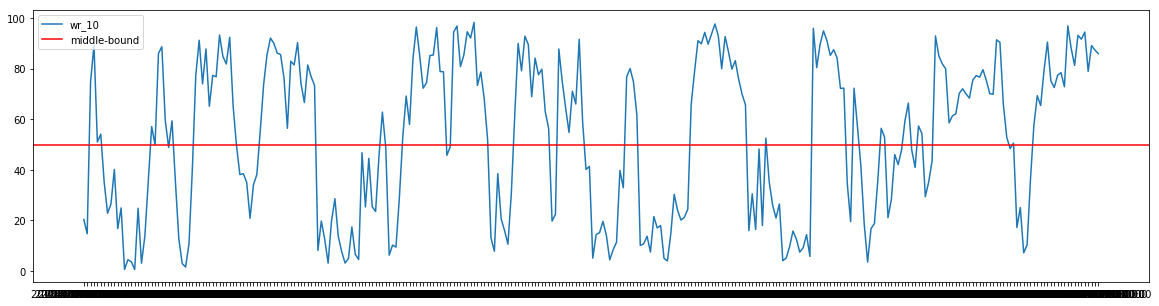

In [24]:
ss_df = ti.convert2stockstats(df)
ss_df = ti.create_indicator_df(ss_df, 'wr_10')
%matplotlib inline
plt.figure(figsize = (20,5))
plt.plot('timestamp', 'wr_10', data = df, label = 'wr_10')
plt.axhline(y=50, color = 'red', label = 'middle-bound')
plt.legend(loc = 2)

In [17]:

brute_results = ti.brute_force_opt(df, 'wr', 3, 50, 3, 50, 50, 50, dupe_bool=True)
print('OPTIM: {}'.format(brute_results[0]))
#print('SHARPE RATIO: {}'.format(brute_results[1]))
print('CUMULATIVE RETURNS: {}'.format(brute_results[2]))
print('HEAD:\n {}'.format(brute_results[3]))

OPTIM: (29, 5)
CUMULATIVE RETURNS: 0.23332668111670907
HEAD:
      close     open     high      low      wr_29         ma signal
0  8084.61  8569.32  8573.35  7862.31  40.151470  35.733553    Buy
1  9544.84  8797.27  9735.64  8484.32  57.295326  59.336162   Sell
2  7921.63  8079.77  8187.60  7858.12  46.412860  41.329379    Buy
3  8533.00  8249.24  8591.45  8181.46  70.783830  83.281104   Sell
4  6306.85  6668.84  6683.61  6277.23  43.057602  39.206110    Buy
5  6322.92  6242.53  6483.39  6176.89  87.510975  89.119940   Sell
6  6705.03  7369.89  7401.43  6694.06  46.705292  16.208447    Buy
7  6492.00  6337.08  6534.89  6337.08  72.153497  75.632563   Sell
8  6581.07  6631.79  6633.22  6487.86  36.024280  31.797518    Buy
9  6612.36  6277.73  7234.83  6244.77  56.392857  77.596680   Sell


# TRIX

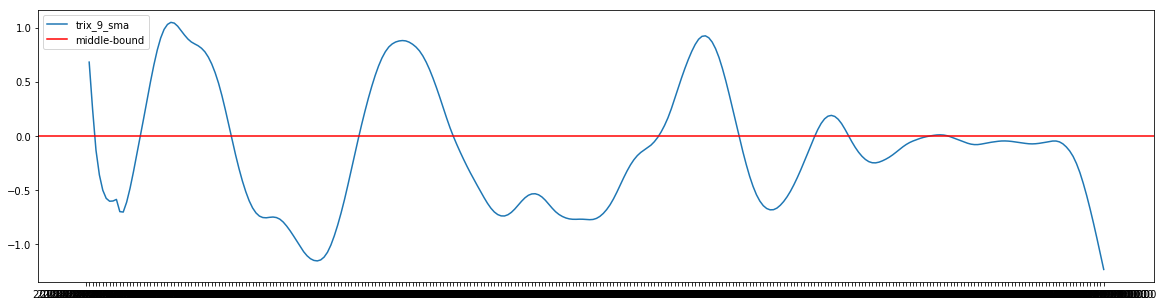

In [25]:
ss_df = ti.create_indicator_df(ss_df, 'trix_9_sma')
%matplotlib inline
plt.figure(figsize = (20,5))
plt.plot('timestamp', 'trix_9_sma', data = df, label= 'trix_9_sma')
plt.axhline(y=0, color = 'red', label = 'middle-bound')
plt.legend(loc = 2)

In [19]:
brute_results = ti.brute_force_opt(df, 'trix', 3, 50, 3, 50, 0, 0, dupe_bool=True, ma = True)
print('OPTIM: {}'.format(brute_results[0]))
#print('SHARPE RATIO: {}'.format(brute_results[1]))
print('CUMULATIVE RETURNS: {}'.format(brute_results[2]))
print('HEAD:\n {}'.format(brute_results[3].head()))

/Users/kevin_le/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


OPTIM: (12, 3)
CUMULATIVE RETURNS: 0.43794301222957865
HEAD:
       close      open      high       low  trix_12_sma        ma signal
0   8084.61   8569.32   8573.35   7862.31    -0.587611 -0.598013    Buy
1  11465.36  11043.12  11530.66  11043.12     0.983702  0.986140   Sell
2   7899.11   7927.73   8237.16   7758.80    -1.116037 -1.119566    Buy
3   9321.16   9196.13   9373.46   8987.27     0.857941  0.863058   Sell
4   7627.52   7700.40   7709.61   7559.50    -0.694496 -0.703063    Buy


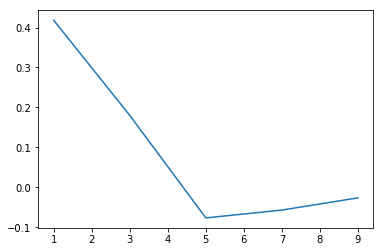

In [31]:
returns = brute_results[3][['close', 'open']]
returns = returns.pct_change()
returns = returns.iloc[1::2, :]
plt.plot(returns['close'])